### **Three-Qubit Gates**
#### For three qubits, the basis vectors are -
|000> , |001> , |010> , |011> , |100> , |110> , |101> , |111> 
<br>

<center><b>We know </b></center>
$$\ket{abc}=\ket{a}\otimes\ket{b}\otimes\ket{c} $$

<left><b>For eg$\to$<b><left>
#### 1)    
$$ \ket{000}=\ket{0}\otimes\ket{0}\otimes\ket{0} $$
<br>

$$\ket{000}=\begin{bmatrix}1 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0\end{bmatrix} $$
####     
 
<br>


<left><b>Trick<b><left>
$$\ket{\psi}=\begin{bmatrix}|000> \\ |001> \\ |010> \\ |011> \\ |100> \\ |101> \\ |110> \\ |111>\end{bmatrix} $$
<center><b> Matrix form of $\ket{\psi}$= |abc> could be obtained by replacing |abc> with 1 in the above matrix and all other elements as 0<b><left> 

In [21]:
# importing dependencies
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile , assemble
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit import Aer, execute, visualization
import matplotlib.pyplot as plt
import numpy as np
from math import pi,sqrt
from IPython.display import Video
from qiskit.visualization import array_to_latex



# importing dependencies
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer
from qiskit import Aer, execute, visualization
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from IPython.display import Video

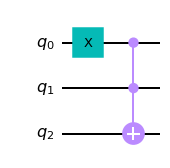

Toffoli Gate:


<IPython.core.display.Latex object>

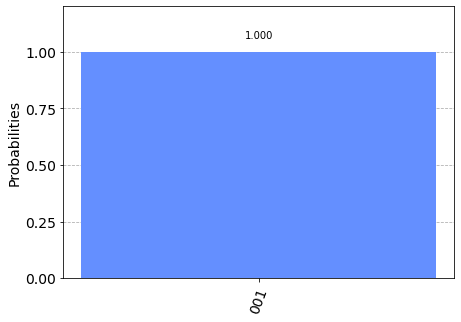

In [34]:
qc = QuantumCircuit(3)
qc.x(0)
qc.ccx(0,1,2)  #qc.ccx(contol qubit1, control qubt 2 , target qubit)
display(qc.draw())
# executing the circuit

b = BasicAer.get_backend('unitary_simulator')
job = execute(qc, b)
result = job.result()

Toffoli_gate = b.run(transpile(qc, b)).result().get_unitary(qc, decimals=3)
print("Toffoli Gate:")
display(visualization.array_to_latex(Toffoli_gate))

backend = BasicAer.get_backend('statevector_simulator')
job1 = execute(qc, backend)
result1 = job1.result()

# probability of output state

counts = result1.get_counts(qc)
graph = visualization.plot_histogram(counts)
display(graph)



#### **Controlled swap gate (Fredkin Gate)(Cswap gate)**
<br>
<center><b>It exchanges the second and third qubits if the first qubit (LSB) is |1> :</b></center>
<br>
$$
|abc>\, \to \left\{
    \begin{array}\\
        |bac> & \mbox{if } c=1 \\
        |abc> & \mbox{if } c= 0 
    \end{array}
\right.
$$
<br>
<left><b>Let q0 be the control qubit  and q1 , q2 target qubits<b><left>
<br>
    $$
|q_2q_1q_0> \,\to \left\{
    \begin{array}\\
        |q_1q_2q_0> & \mbox{if } q_0=1 \\
        |q_2q_1q_0> & \mbox{if } q_0= 0 
    \end{array}
\right.
$$

<br>
<center><b>$$C_{Swap}=\begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\ 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1\end{bmatrix} $$</b></center>
<br>


##### Note: Cswap Gate matrix is specific to the qubit selected as control qubit. The matrix won't be same as above when q1 or q2 is control qubit

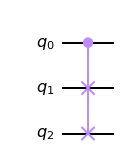

Cswap:


<IPython.core.display.Latex object>

In [5]:
qc = QuantumCircuit(3)
qc.cswap(0,1,2)    #cswap( controlled_qubit , target_qubit1 , target_qubit2)
qc.draw()
#Here q0 as control bit,with q0=0 ,thus q1 and q2  states will not be swapped

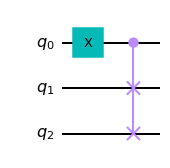

In [7]:
qc = QuantumCircuit(3)
qc.x(0)            #changing the control_qubit q0 to |1> , q1 and q2 states will be swapped
qc.cswap(0,1,2)    #we could select q1 as control_qubit by writing qc.cswap(1,0,2) and hence the Cswap gate matrix will change
qc.draw()

In [8]:
print("1)   |101>") # (control bit) q0=1 , q1=0 , q2=1 . thus q1 and q2 will swap. thus the result would be q1=1 , q2=0 , q0=1 
one_state = np.matrix([[0],[0],[0],[0],[0],[1],[0],[0]])
display(visualization.array_to_latex(one_state))
print("Cswap Gate")
display(visualization.array_to_latex(cswap_gate))

output = cswap_gate*one_state
print("Applying Cswap Gate gate on |101> gives to |011>, that is:")
display(visualization.array_to_latex(output))

print("\n")

print("2)   |011>") # (control bit) q0=1 , q1=1 , q2=0 . thus q1 and q2 will swap. thus the result would be q1=0 , q2=1 , q0=1 
one_state = np.matrix([[0],[0],[0],[1],[0],[0],[0],[0]])
display(visualization.array_to_latex(one_state))
print("Cswap Gate")
display(visualization.array_to_latex(cswap_gate))

output = cswap_gate*one_state
print("Applying Cswap Gate gate on |011> gives to |101>, that is:")
display(visualization.array_to_latex(output))


print("3)   |100>") # (control bit) q0=0 , q1=0 , q2=1 . thus q1 and q2 will not be  swapped  
one_state = np.matrix([[0],[0],[0],[0],[1],[0],[0],[0]])
display(visualization.array_to_latex(one_state))

output = cswap_gate*one_state
print("Applying Cswap Gate gate on |100>  doesn't change the output because controlled bit is 0")
display(visualization.array_to_latex(output))

1)   |101>


<IPython.core.display.Latex object>

Cswap Gate


<IPython.core.display.Latex object>

Applying Cswap Gate gate on |101> gives to |011>, that is:


<IPython.core.display.Latex object>



2)   |011>


<IPython.core.display.Latex object>

Cswap Gate


<IPython.core.display.Latex object>

Applying Cswap Gate gate on |011> gives to |101>, that is:


<IPython.core.display.Latex object>

3)   |100>


<IPython.core.display.Latex object>

Applying Cswap Gate gate on |100>  doesn't change the output because controlled bit is 0


<IPython.core.display.Latex object>